# Matplotlib - Stylesheets & 3D Plotting
## Plot Customization by Hand

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

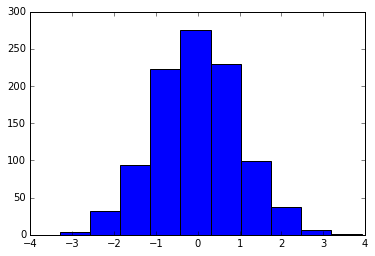

In [2]:
x = np.random.randn(1000)
plt.hist(x);

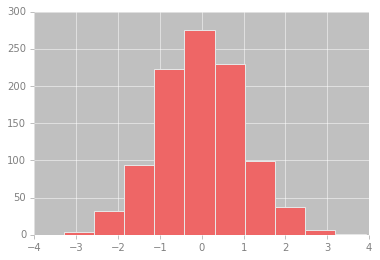

In [11]:
# adjust by hand to make it more pleasing

# use a gray background
ax = plt.axes(axisbg='#C0C0C0')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

## Changing the Defaults: rcParams

In [15]:
IPython_default = plt.rcParams.copy()

from matplotlib import cycler
colors = cycler('color',
               ['#EE6666', '#3388BB', '#9988DD',
                '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#C0C0C0', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

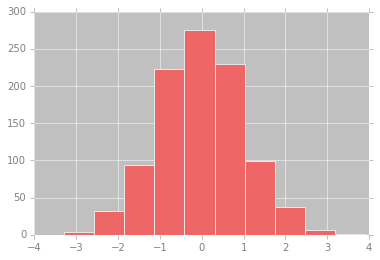

In [16]:
plt.hist(x);

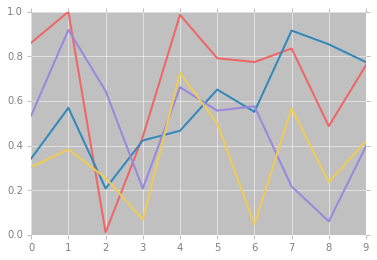

In [17]:
for i in range(4):
    plt.plot(np.random.rand(10))

## Stylesheets

In [18]:
plt.style.available[:5]

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale']

In [19]:
# create a function that makes two basic types of plot
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

#### Default style

In [20]:
# reset rcParams
plt.rcParams.update(IPython_default);

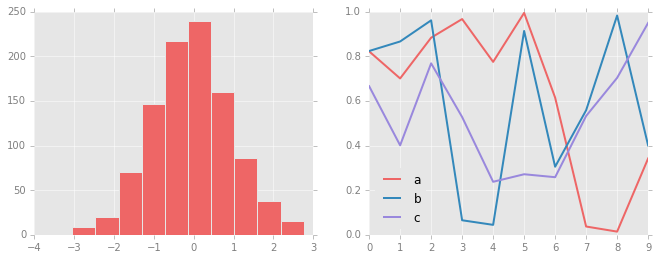

In [21]:
hist_and_lines()

#### FiveThirtyEight style

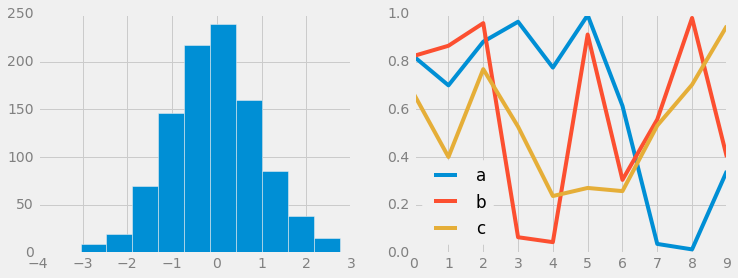

In [22]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

#### ggplot

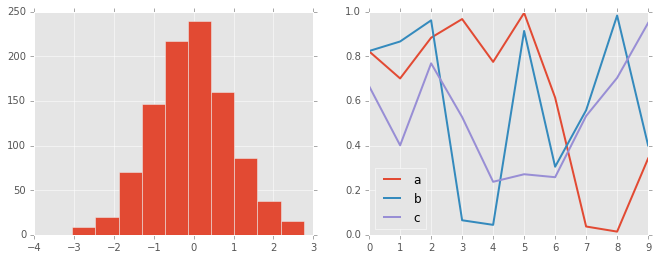

In [23]:
with plt.style.context('ggplot'):
    hist_and_lines()

#### Bayesian Methods for Hackers style

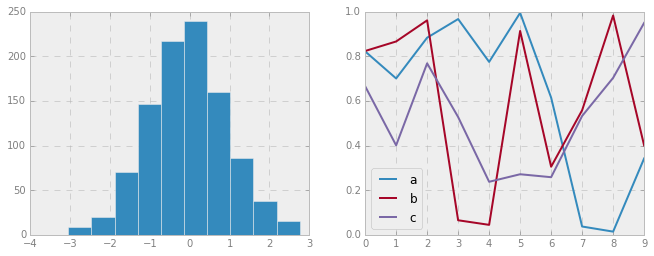

In [24]:
with plt.style.context('bmh'):
    hist_and_lines()

#### Dark background

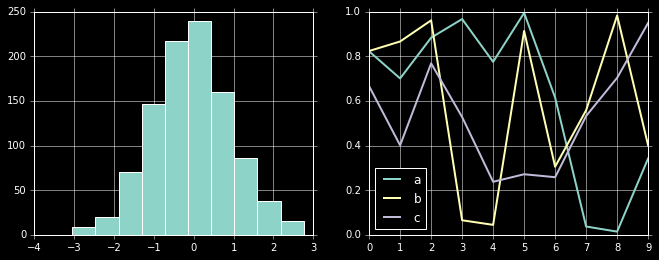

In [25]:
with plt.style.context('dark_background'):
    hist_and_lines()

#### Grayscale

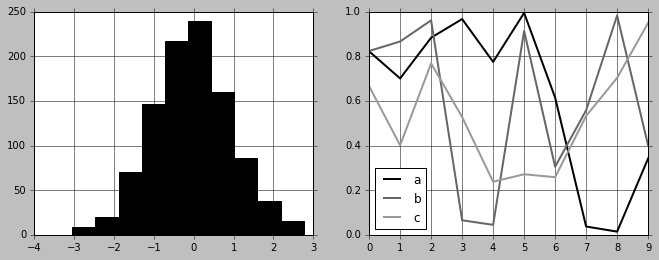

In [26]:
with plt.style.context('grayscale'):
    hist_and_lines()

#### Seaborn style

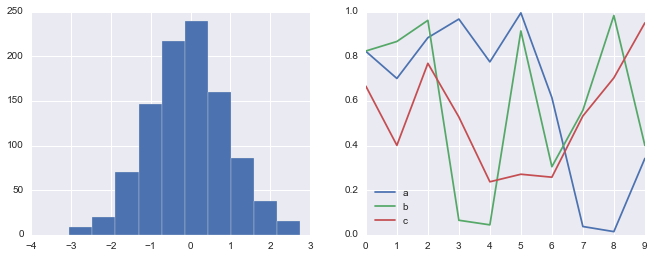

In [27]:
import seaborn
hist_and_lines()

## Three-Dimensional Plotting in Matplotlib

In [28]:
from mpl_toolkits import mplot3d

In [29]:
import numpy as np

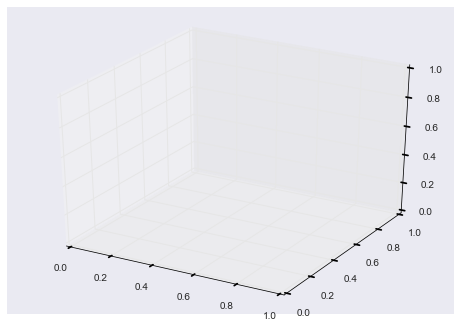

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')

## 3D Points and Lines

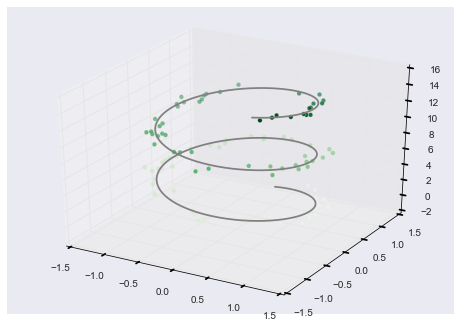

In [32]:
ax = plt.axes(projection='3d')

# Data for a 3D line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for 3d scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## 3D Contour Plots

In [33]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

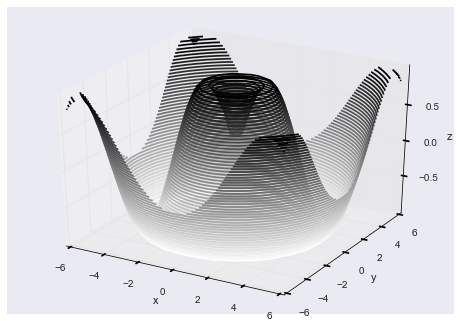

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

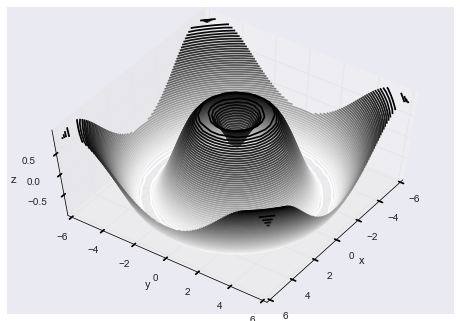

In [36]:
ax.view_init(60,35)
fig

## Wireframes and Surface Plots

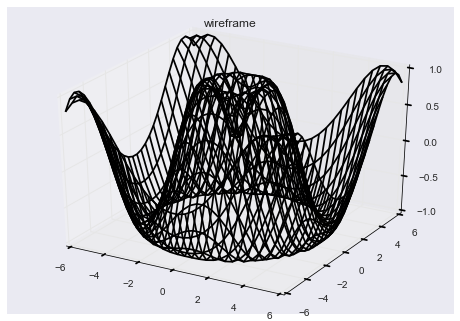

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

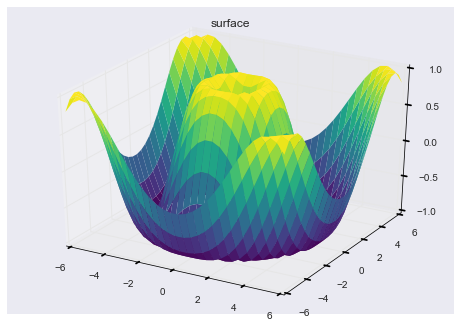

In [38]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

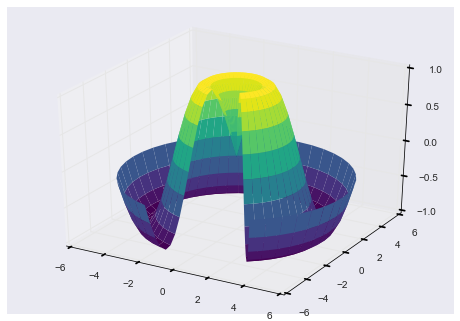

In [39]:
r= np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

## Surface Triangulations

In [40]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

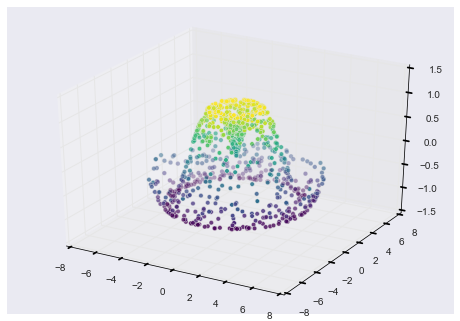

In [41]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

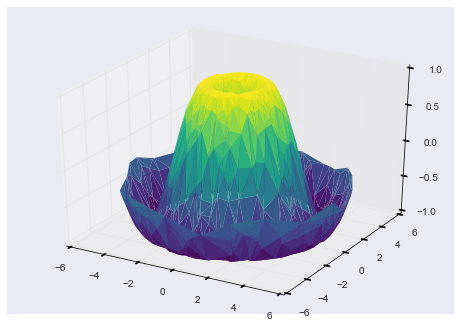

In [42]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

#### Example: Visualizing a Möbius strip

In [43]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [44]:
phi = 0.5 * theta

In [45]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

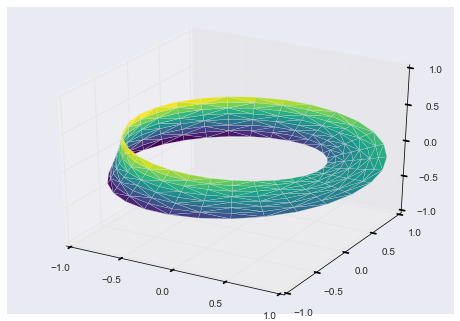

In [46]:
# triangulate in the underlying parameterization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap = 'viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);